# DAUP ASSIGNMENT ISB Co'24 AMPBA
By Sudeshna Kundu, PGID : 12310045

QUESTION 4 Solution

In [1]:
# !pip install seaborn
#!pip install statistics

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
import statistics
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
path_file = r"./earthquake.csv"
df = pd.read_csv(path_file)
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

In [5]:
df.shape

(23412, 21)

To Analyse Eathquakes,
1. Date format has to be changed to dd-mm-yyyy
2. First have to filter by rows on type field as Earthquake
3. Create columns magnitudes wrt to magnitude type
4. drop the unecesssary columns
5. find corr among variables 
6. count of statuses 
7. how is azumuthal gap related to Magnitude Seismic Stations & Horizontal Distance
8. how is Horizontal dist related to depth



# Data Preprocessing

In [6]:
df = df.loc[df['Type']=="Earthquake"]
df.shape

(23232, 21)

In [7]:
df['Date'] = df['Date'][0:9].astype('datetime64[ns]')
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,1965-01-02,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,1965-01-04,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,1965-01-05,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,1965-01-08,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,1965-01-09,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


Creatings columns for different magnitudes wrt to magnitude type

In [8]:
df['Richter Magnitude'] = df['Magnitude'].loc[df['Magnitude Type']=="ML"]
df['Surface-wave Magnitude'] = df['Magnitude'].loc[df['Magnitude Type']=="MS"]
df['Body-wave Magnitude'] = df['Magnitude'].loc[df['Magnitude Type']=="MB"]
df['Moment Magnitude'] = df['Magnitude'].loc[df['Magnitude Type']=="MW"]
df['Duration Magnitude'] = df['Magnitude'].loc[df['Magnitude Type']=="MD"]

In [9]:
df = df.loc[(df['Magnitude Type']=="ML") | (df['Magnitude Type']=="MS") | (df['Magnitude Type']=="MW") | (df['Magnitude Type']=="MB") | (df['Magnitude Type']=="MD")]
df.describe()

,Latitude,Longitude,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,Richter Magnitude,Surface-wave Magnitude,Body-wave Magnitude,Moment Magnitude,Duration Magnitude
count,13089.000000,13089.000000,13089.000000,1848.000000,622.000000,13089.000000,119.000000,2292.000000,651.000000,166.000000,156.000000,7348.000000,65.000000,1702.000000,3594.000000,7722.000000,6.000000
mean,2.709632,43.326818,72.896829,5.671242,165.040193,5.870045,0.077017,48.776178,73.099109,1.610071,5.248583,1.062149,5.842462,5.994360,5.674541,5.933794,5.966667
std,30.035345,125.669905,120.269203,5.020348,130.349376,0.415486,0.059602,65.047161,59.493036,2.548774,11.275118,0.193954,0.301750,0.486904,0.206383,0.440934,0.432049
min,-72.448000,-179.997000,-1.100000,0.015000,0.000000,5.500000,0.000000,0.000000,0.000000,0.004505,0.085000,0.000000,5.500000,5.500000,5.500000,5.500000,5.600000
25%,-17.808000,-73.694000,22.200000,2.800000,59.000000,5.600000,0.040500,9.000000,33.250000,0.145000,0.590000,1.000000,5.600000,5.600000,5.500000,5.600000,5.725000
50%,-3.276000,119.922000,33.000000,4.400000,130.000000,5.700000,0.057000,28.000000,52.700000,0.695800,3.465000,1.100000,5.750000,5.900000,5.600000,5.800000,5.850000
75%,28.729000,146.572000,58.000000,7.100000,248.500000,6.000000,0.089500,65.000000,90.500000,1.796250,7.025000,1.200000,6.000000,6.200000,5.800000,6.100000,5.975000
max,85.992000,179.992000,700.000000,91.295000,668.000000,9.100000,0.350000,821.000000,335.000000,18.578000,99.000000,3.220000,6.700000,8.000000,6.900000,9.100000,6.800000


For Richter scale being null, but earthquake has happened , there could be a possibility that in richter scale didnot or was not able therefore we will replace null values of richter scale as mean
Similarly replacing all the null values scales of magnitude as their respective mean

In [10]:
df['Richter Magnitude'] = df['Richter Magnitude'].fillna(5.842)
df['Surface-wave Magnitude'] = df['Richter Magnitude'].fillna(5.994)
df['Body-wave Magnitude'] = df['Richter Magnitude'].fillna(5.674)
df['Moment Magnitude'] = df['Richter Magnitude'].fillna(5.9338)
df['Duration Magnitude'] = df['Richter Magnitude'].fillna(5.96)
df.drop(['Time','Latitude', 'Longitude', 'Magnitude', 'Magnitude Type', 'Source', 'Location Source', 'Magnitude Source'], axis=1)
df.describe()

,Latitude,Longitude,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,Richter Magnitude,Surface-wave Magnitude,Body-wave Magnitude,Moment Magnitude,Duration Magnitude
count,13089.000000,13089.000000,13089.000000,1848.000000,622.000000,13089.000000,119.000000,2292.000000,651.000000,166.000000,156.000000,7348.000000,13089.000000,13089.000000,13089.000000,13089.000000,13089.000000
mean,2.709632,43.326818,72.896829,5.671242,165.040193,5.870045,0.077017,48.776178,73.099109,1.610071,5.248583,1.062149,5.842002,5.842002,5.842002,5.842002,5.842002
std,30.035345,125.669905,120.269203,5.020348,130.349376,0.415486,0.059602,65.047161,59.493036,2.548774,11.275118,0.193954,0.021101,0.021101,0.021101,0.021101,0.021101
min,-72.448000,-179.997000,-1.100000,0.015000,0.000000,5.500000,0.000000,0.000000,0.000000,0.004505,0.085000,0.000000,5.500000,5.500000,5.500000,5.500000,5.500000
25%,-17.808000,-73.694000,22.200000,2.800000,59.000000,5.600000,0.040500,9.000000,33.250000,0.145000,0.590000,1.000000,5.842000,5.842000,5.842000,5.842000,5.842000
50%,-3.276000,119.922000,33.000000,4.400000,130.000000,5.700000,0.057000,28.000000,52.700000,0.695800,3.465000,1.100000,5.842000,5.842000,5.842000,5.842000,5.842000
75%,28.729000,146.572000,58.000000,7.100000,248.500000,6.000000,0.089500,65.000000,90.500000,1.796250,7.025000,1.200000,5.842000,5.842000,5.842000,5.842000,5.842000
max,85.992000,179.992000,700.000000,91.295000,668.000000,9.100000,0.350000,821.000000,335.000000,18.578000,99.000000,3.220000,6.700000,6.700000,6.700000,6.700000,6.700000


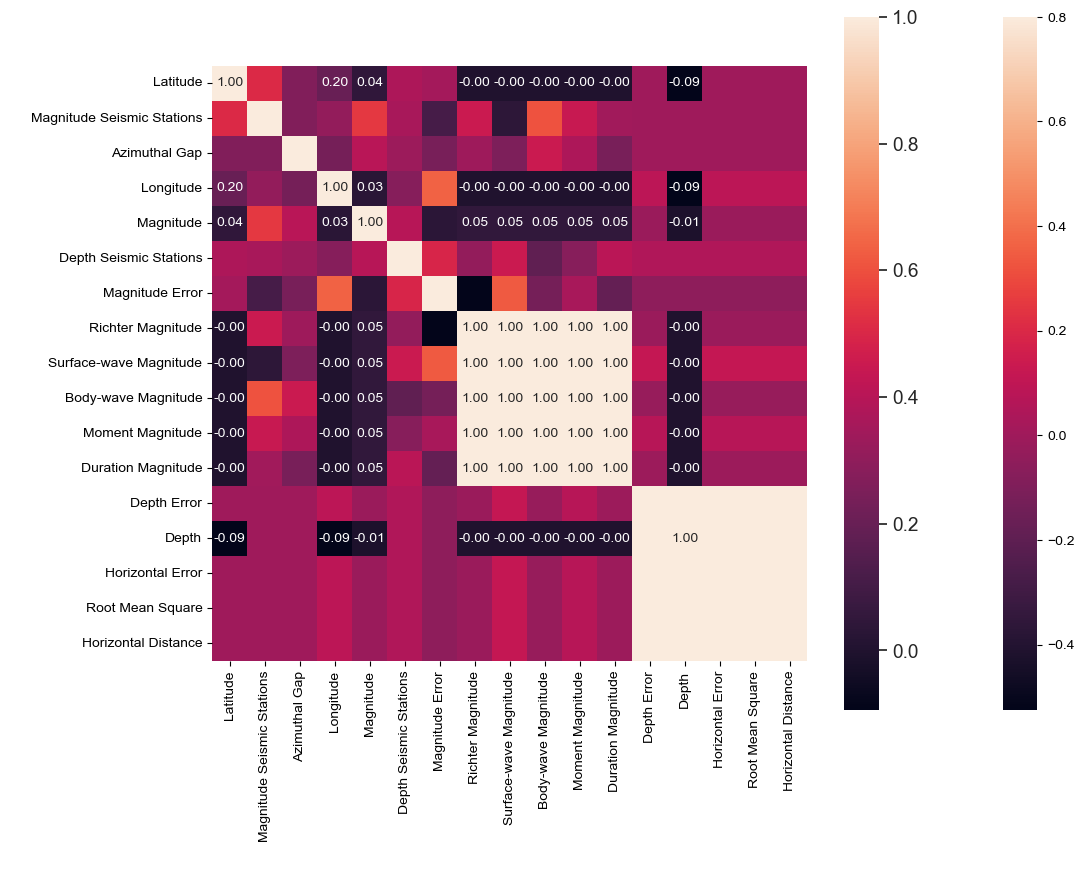

In [11]:
# correlation matrix
k=17
corrmat = df.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat,vmax=0.8,square=True)

cols = corrmat.nlargest(k,'Latitude')['Latitude'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f',annot_kws={'size':10}, yticklabels=cols.values,xticklabels=cols.values)
plt.show()

Richter Magnitude, Surface-wave Magnitude, Body-wave Magnitude, Moment Magnitude and Duration Magnitude are all highly correlated with each other

,Azimuthal Gap,Magnitude Seismic Stations
Azimuthal Gap,1.000000,-0.401915
Magnitude Seismic Stations,-0.401915,1.000000


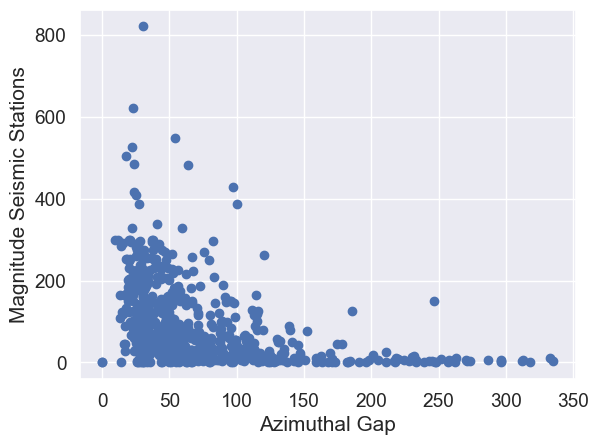

In [12]:
plt.scatter(df['Azimuthal Gap'],df['Magnitude Seismic Stations'])
plt.xlabel("Azimuthal Gap")
plt.ylabel("Magnitude Seismic Stations")
df1 = df[['Azimuthal Gap','Magnitude Seismic Stations']]
df1.corr(method='pearson')

,Azimuthal Gap,Horizontal Distance
Azimuthal Gap,1.000000,-0.265851
Horizontal Distance,-0.265851,1.000000


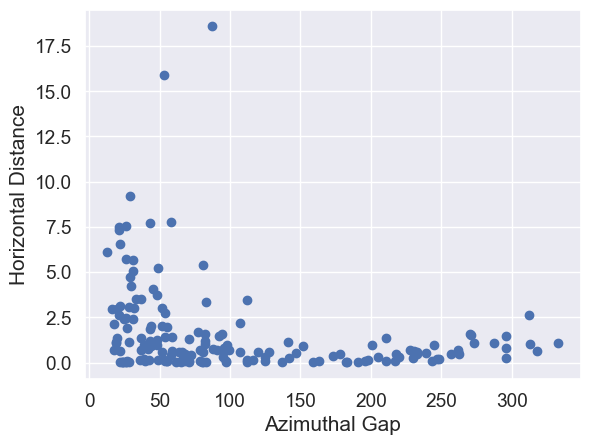

In [13]:
plt.scatter(df['Azimuthal Gap'],df['Horizontal Distance'])
plt.xlabel("Azimuthal Gap")
plt.ylabel("Horizontal Distance")
df1 = df[['Azimuthal Gap','Horizontal Distance']]
df1.corr(method='pearson')

Conclusion : So basically We can see that, when azimuthal gap is low, we see an increase in the magnitude of seismic stations.
Also Azimuthal Gap and Horizontal Distance doesnot have much co-relation, but azimuthal gap increases with the decrease in horizontal distance.

,Depth,Horizontal Distance
Depth,1.000000,0.133495
Horizontal Distance,0.133495,1.000000


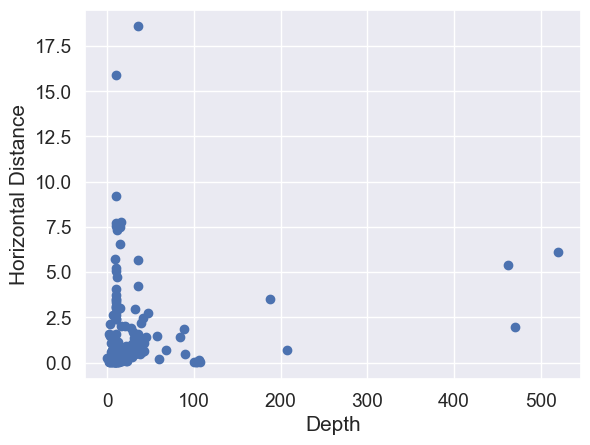

In [14]:
plt.scatter(df['Depth'],df['Horizontal Distance'])
plt.xlabel("Depth")
plt.ylabel("Horizontal Distance")
df1 = df[['Depth','Horizontal Distance']]
df1.corr(method='pearson')

,Azimuthal Gap,Depth
Azimuthal Gap,1.000000,-0.100384
Depth,-0.100384,1.000000


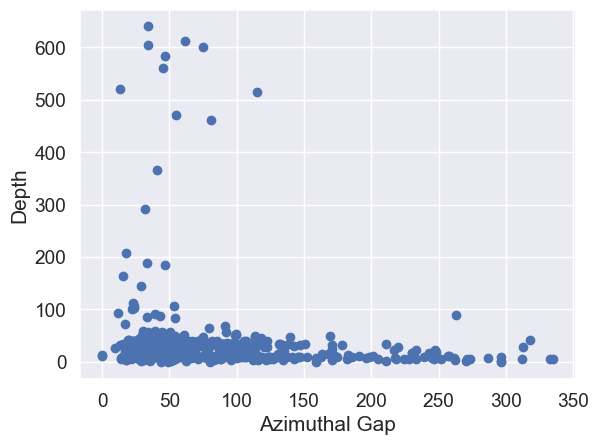

In [15]:
plt.scatter(df['Azimuthal Gap'],df['Depth'])
plt.xlabel("Azimuthal Gap")
plt.ylabel("Depth")
df1 = df[['Azimuthal Gap','Depth']]
df1.corr(method='pearson')

Conclusion : So basically We can see that, when azimuthal gap is low, we see a slight increase in the depth. 
    Also when Horizontal Distance increases depth also increases, there is a slight positive correlation.

So when azumuthal gap increases, there is decrease in depth & horizontal distance.